In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
csv_file = "E:\ML Projects\Housing Project\housing.csv"

In [12]:
df = pd.read_csv(csv_file)

In [27]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

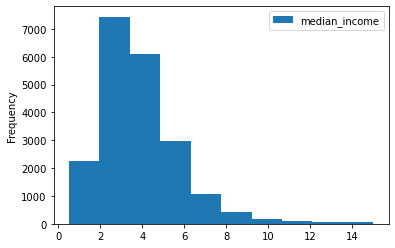

In [29]:
df[["median_income"]].plot(kind='hist')

In [65]:
df["income_cat"] = pd.cut(df["median_income"],
                        bins= [0.0 , 1.5 ,3.0 ,4.5 ,6.0 ,np.inf],
                        labels= [1,2,3,4,5])

In [66]:
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state= 42)

In [67]:
for train_ix , test_ix in split.split(df , df ["median_income"]) :
    print(train_ix , test_ix)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [68]:
train_df = df.loc[train_ix]

In [71]:
train_df.shape

(16512, 11)

In [73]:
test_df = df.loc[test_ix]

In [74]:
test_df.shape

(4128, 11)

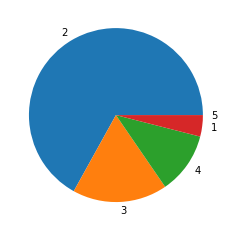

In [78]:
plt.pie(train_df.income_cat.value_counts(),labels=train_df.income_cat.value_counts().index)
plt.show()

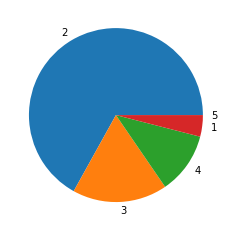

In [80]:
plt.pie(test_df.income_cat.value_counts(),labels=test_df.income_cat.value_counts().index)
plt.show()